#### Ejercicio 6.1 imagen Saigon 

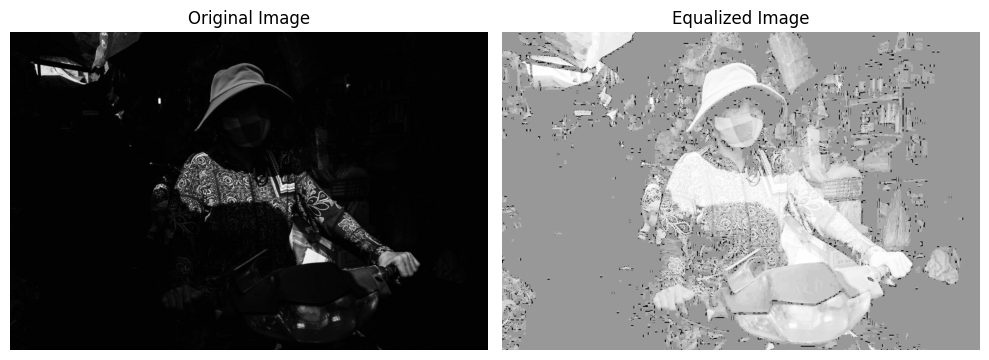

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the file
image_path = './imgs/saigon.jpeg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

def histogram_equalization(image_array):
    # Calculate the histogram
    histogram, bins = np.histogram(image_array.flatten(), 256, [0,256])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = cdf * float(histogram.max()) / cdf.max()
    
    # Normalize the CDF to [0,255]
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    
    # Map the original grayscale values to equalized values
    image_equalized = cdf[image_array]
    
    return image_equalized

# Apply histogram equalization to the image array
image_equalized = histogram_equalization(image_array)

# Convert the equalized array back to an image
image_equalized_pil = Image.fromarray(image_equalized)

# Display the original and equalized images side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Equalized image
axes[1].imshow(image_equalized_pil, cmap='gray')
axes[1].set_title('Equalized Image')
axes[1].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Ejercicio 6.2 imagen Monkey

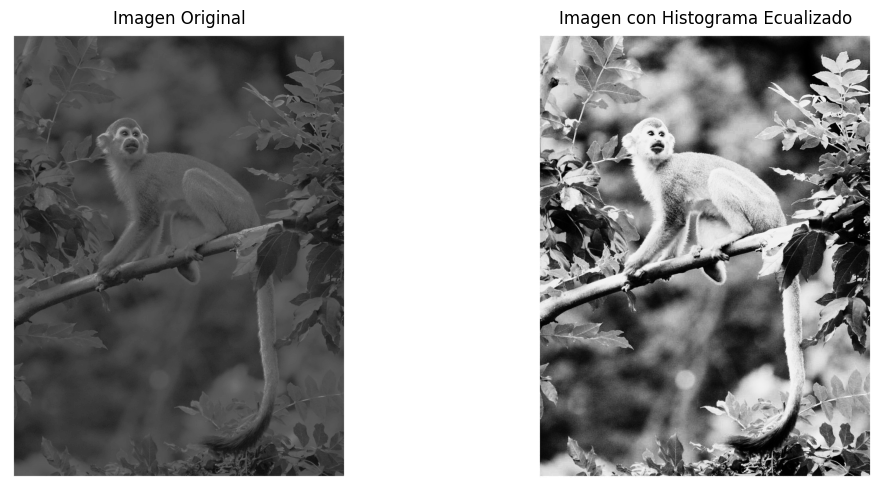

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def histogram_equalization(image_array):
    # Aplanar el array de la imagen y calcular el histograma
    histogram, _ = np.histogram(image_array.flatten(), bins=256, range=[0, 256])

    # Calcular la función de distribución acumulativa
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()

    # Usar la función de distribución acumulativa para mapear los viejos valores de píxeles a nuevos
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Mapear los viejos valores a los nuevos
    image_equalized = cdf[image_array]

    return image_equalized

# Cargar la imagen y convertirla a escala de grises
monkey_image_path = './imgs/monkey.jpeg'  # Actualizar con la ruta correcta
monkey_image = Image.open(monkey_image_path).convert('L')
monkey_array = np.array(monkey_image)

# Aplicar la ecualización del histograma
monkey_equalized_array = histogram_equalization(monkey_array)

# Convertir de nuevo a imagen PIL
monkey_equalized_image = Image.fromarray(monkey_equalized_array)

# Mostrar la imagen original y la imagen con histograma ecualizado lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Imagen original
axes[0].imshow(monkey_image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Imagen con histograma ecualizado
axes[1].imshow(monkey_equalized_image, cmap='gray')
axes[1].set_title('Imagen con Histograma Ecualizado')
axes[1].axis('off')

plt.tight_layout()
plt.show()


#### Ejercicio 6.3 imagen Rice

[[127 126 121 ...  95  93  91]
 [125 124 120 ...  95  93  91]
 [122 121 118 ...  93  93  91]
 ...
 [ 57  57  56 ...  46  46  46]
 [ 59  58  57 ...  43  42  42]
 [ 61  60  59 ...  42  41  41]]
131


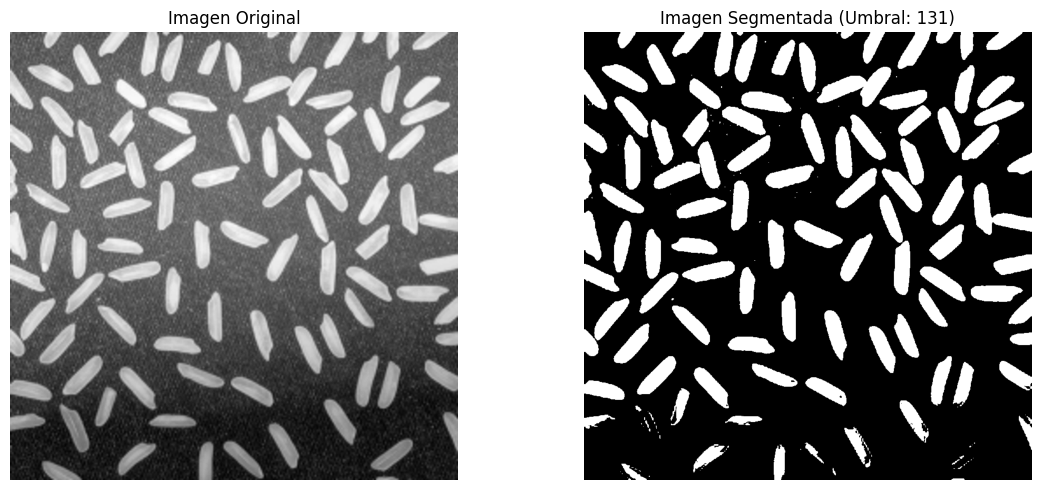

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Cargar la imagen
rice_image_path = './Imgs/rice.jpg'  # Reemplazar con la ruta correcta a tu imagen
rice_image = Image.open(rice_image_path).convert('L')  # Convertir a escala de grises

# Convertir a array de NumPy
rice_array = np.array(rice_image)
print(rice_array)

# Calcular el umbral de Otsu
otsu_threshold = threshold_otsu(rice_array)
print(otsu_threshold)

# Aplicar el umbral para crear una imagen binaria
rice_segmented = rice_array > otsu_threshold

# Graficar la imagen original y la segmentada lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Imagen original
axes[0].imshow(rice_image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Imagen segmentada
axes[1].imshow(rice_segmented, cmap='gray')
axes[1].set_title(f'Imagen Segmentada (Umbral: {otsu_threshold})')
axes[1].axis('off')

plt.tight_layout()
plt.show()
